# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

<h3>Printing out a list of all the files in the directory</h3>

In [2]:
print(os.listdir('/kaggle/input/house-prices-advanced-regression-techniques/'))

['sample_submission.csv', 'data_description.txt', 'train.csv', 'test.csv']


<h3> Reading the train.csv data </h3>

In [3]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Dataset Information

<h3> Looking at all the columns of the given data </h3>

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h3> Identifying the shape of the given dataframe (Rows X Columns)</h3>

In [5]:
df.shape

(1460, 81)

<h3>Printing the following information about our dataset:</h3>
<ul>
    <li>Column Name</li>
    <li>Count of the non-null data</li>
    <li>Datatype of that column</li>
</ul>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h3>Printing the statistical summary of our dataset such as:</h3>
<ul>
    <li>Count</li>
    <li>Mean</li>
    <li>Standard Deviation</li>
    <li>Minimum</li>
    <li>25<sup>th</sup> Percentile</li>
    <li>50<sup>th</sup> Percentile</li>
    <li>75<sup>th</sup> Percentile</li>
    <li>Maximum</li>     
</ul>

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Identifying Correlations in the Data

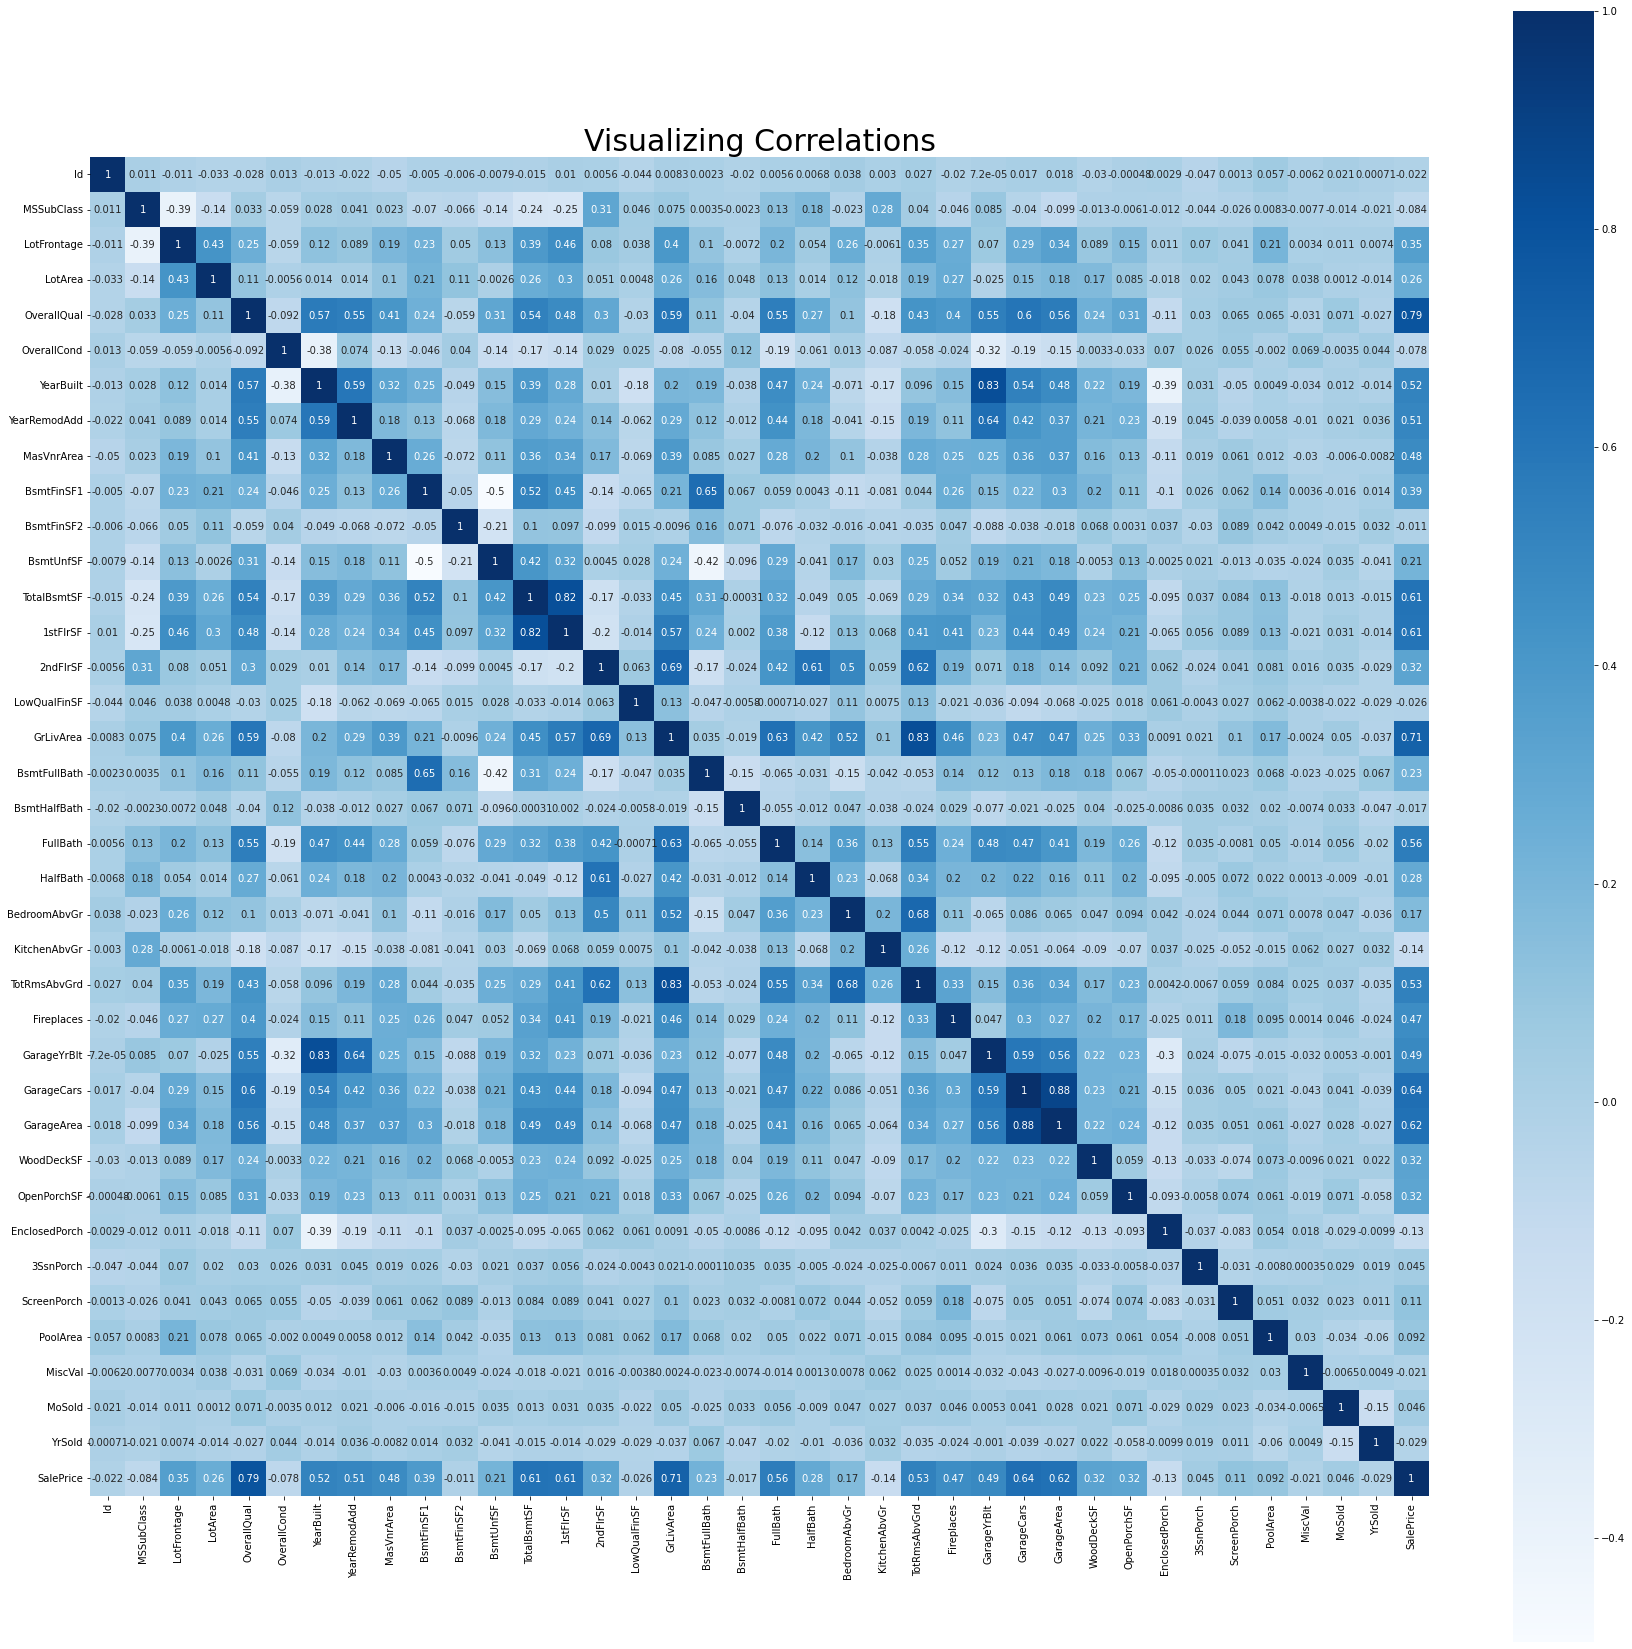

In [8]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 30)
plt.show()

# Selecting Numeric Features
The numerical features with more than a <b>0.50</b> correlation rate with SalePrice have been selected.

In [9]:

num_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
df_num_cols = df[num_cols]
df_num_cols.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

<h3>Creating a pair plot to identify trends and relations in the data</h3>

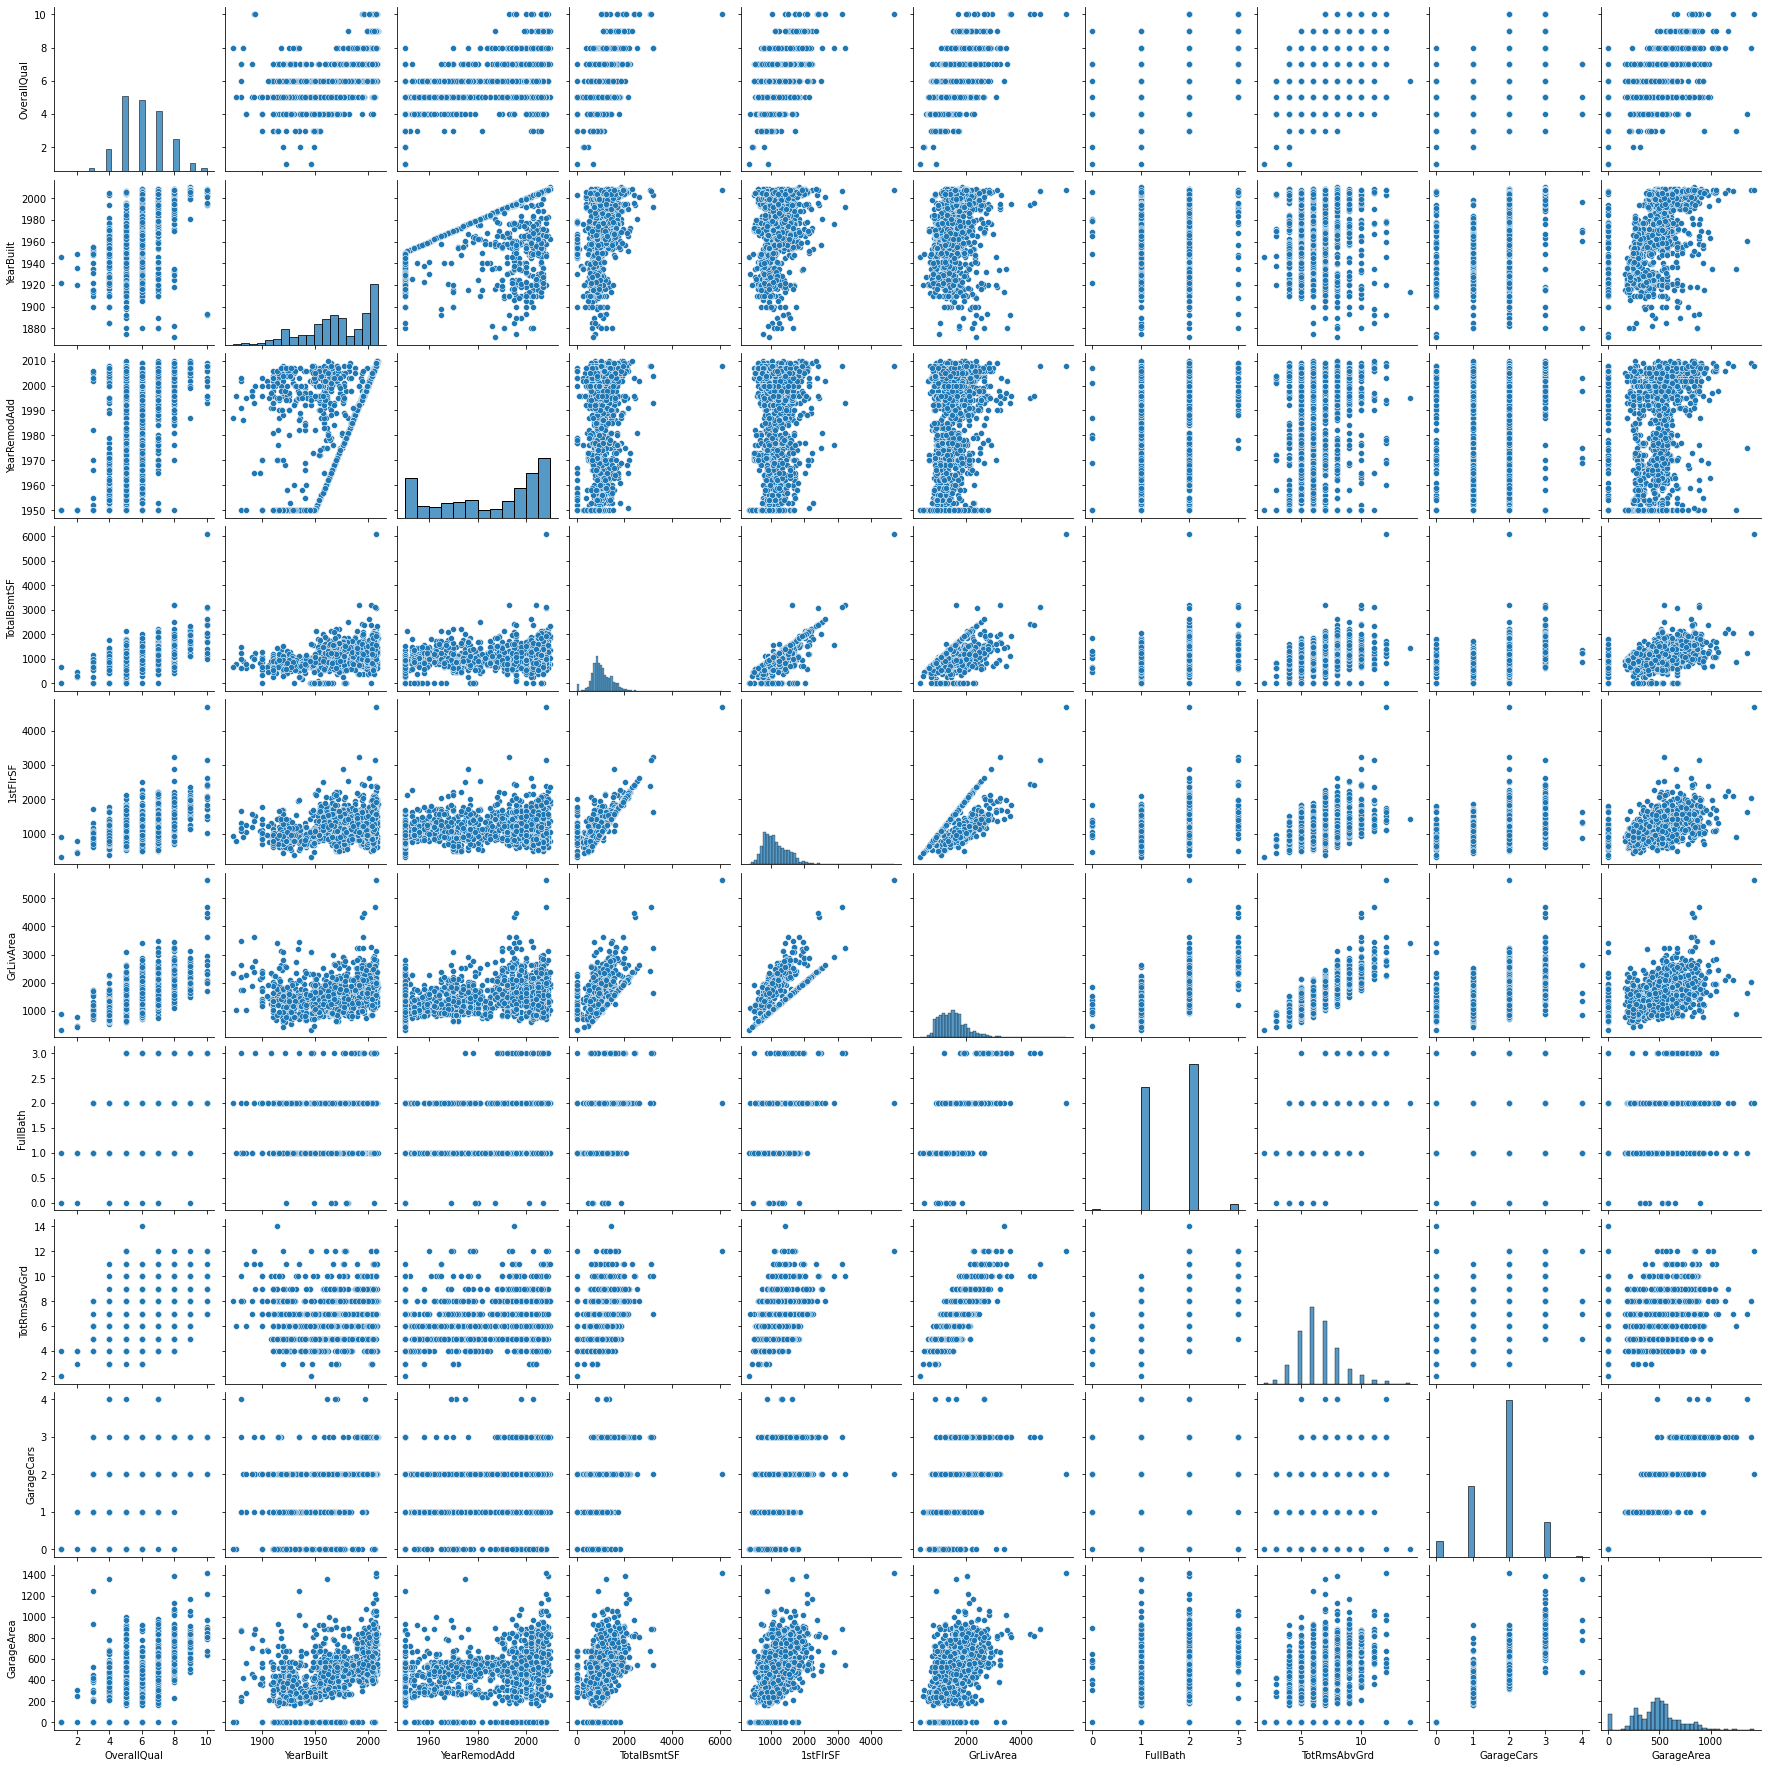

In [10]:
sns.pairplot(df[num_cols])
plt.show()

# g = sns.pairplot(df, vars=["GrLivArea", "FullBath"])

<h3>Looking at the non-numeric features of our dataset</h3>

In [11]:
# df_nn = df.select_dtypes(include = ['O'])
# nn_list = df_nn.columns.tolist()
# print("There are", format(len(df_nn.columns)), "non numerical features in the dataset\n\nThe non numerical features are:\n", df_nn.columns.tolist(), "\n\nCounting the number of NA values for our non numeric data")
# df_nn.isna().sum()

df_nn = df.select_dtypes(include = ['O'])
nn_list = df_nn.columns.tolist()
print("There are", format(len(df_nn.columns)), "non numerical features in the dataset\n\nthe non numerical features are:\n", df_nn.columns.tolist(), "\n\nCounting the number of NA values for our non nimeric data")
df_nn.isna().sum()

There are 43 non numerical features in the dataset

the non numerical features are:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Counting the number of NA values for our non nimeric data


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# Visualize the Count of the Categorical Data

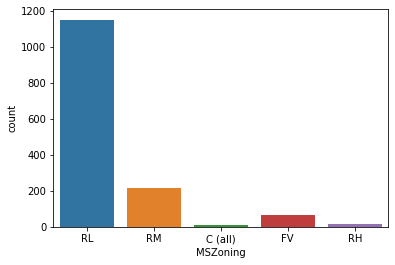

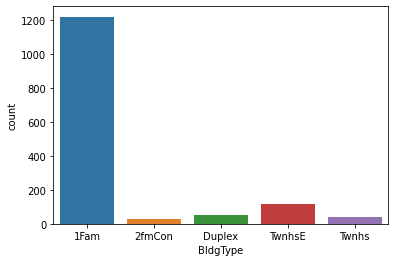

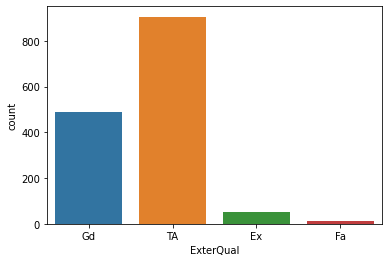

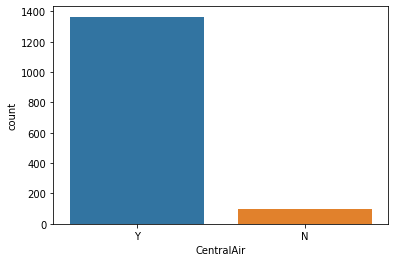

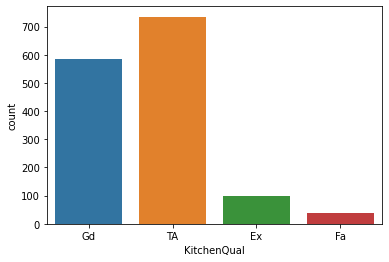

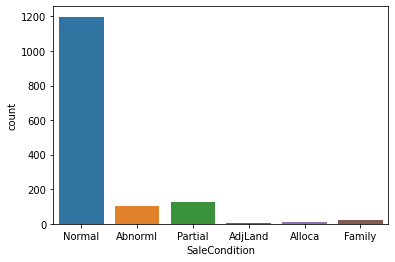

In [12]:

cat_cols = ['MSZoning', 'BldgType', 'ExterQual', 'CentralAir', 'KitchenQual', 'SaleCondition']
df_cat_cols = df[cat_cols]

sns.countplot(x = df_cat_cols['MSZoning'], data = df_cat_cols)
plt.show()

sns.countplot(x = df_cat_cols['BldgType'], data = df_cat_cols)
plt.show()
sns.countplot(x = df_cat_cols['ExterQual'], data = df_cat_cols)
plt.show()
sns.countplot(x = df_cat_cols['CentralAir'], data = df_cat_cols)
plt.show()
sns.countplot(x = df_cat_cols['KitchenQual'], data = df_cat_cols)
plt.show()
sns.countplot(x = df_cat_cols['SaleCondition'], data = df_cat_cols)
plt.show()



# Final Features Selected

In [13]:
final_features = list(num_cols + cat_cols)
print(final_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MSZoning', 'BldgType', 'ExterQual', 'CentralAir', 'KitchenQual', 'SaleCondition']


<h3>Final dataset used with only the selected features

In [14]:
df = df[final_features + ['SalePrice']]
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,BldgType,ExterQual,CentralAir,KitchenQual,SaleCondition,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,RL,1Fam,Gd,Y,Gd,Normal,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,RL,1Fam,TA,Y,TA,Normal,181500
2,7,2001,2002,920,920,1786,2,6,2,608,RL,1Fam,Gd,Y,Gd,Normal,223500
3,7,1915,1970,756,961,1717,1,7,3,642,RL,1Fam,TA,Y,Gd,Abnorml,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,RL,1Fam,Gd,Y,Gd,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,RL,1Fam,TA,Y,TA,Normal,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,RL,1Fam,TA,Y,TA,Normal,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,RL,1Fam,Ex,Y,Gd,Normal,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,RL,1Fam,TA,Y,Gd,Normal,142125


# Encoding the Categorical Data
The categorical data can be encoded using Label Encoder. It encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value as assigned earlier. The categorical values can be converted into numeric values.

In [15]:
# label_encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(label_encoder.fit_transform)
# df
label_encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(label_encoder.fit_transform)
df


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,BldgType,ExterQual,CentralAir,KitchenQual,SaleCondition,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,3,0,2,1,2,4,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,3,0,3,1,3,4,181500
2,7,2001,2002,920,920,1786,2,6,2,608,3,0,2,1,2,4,223500
3,7,1915,1970,756,961,1717,1,7,3,642,3,0,3,1,2,0,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,3,0,2,1,2,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,3,0,3,1,3,4,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,3,0,3,1,3,4,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,3,0,0,1,2,4,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,3,0,3,1,2,4,142125


<h3>Assigning features to X and the labels to y</h3>

In [16]:
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,BldgType,ExterQual,CentralAir,KitchenQual,SaleCondition
0,7,2003,2003,856,856,1710,2,8,2,548,3,0,2,1,2,4
1,6,1976,1976,1262,1262,1262,2,6,2,460,3,0,3,1,3,4
2,7,2001,2002,920,920,1786,2,6,2,608,3,0,2,1,2,4
3,7,1915,1970,756,961,1717,1,7,3,642,3,0,3,1,2,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,3,0,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,3,0,3,1,3,4
1456,6,1978,1988,1542,2073,2073,2,7,2,500,3,0,3,1,3,4
1457,7,1941,2006,1152,1188,2340,2,9,1,252,3,0,0,1,2,4
1458,5,1950,1996,1078,1078,1078,1,5,1,240,3,0,3,1,2,4


# Scaling the Data
StandardScaler standardizes a feature by subtracting the mean and then scaling it to unit variance.


In [17]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X, "\n\n\n", "The shape of X is:", X.shape)
# print("\n", y, "\n\n\n", "The shape of y is:", y.shape)

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X, "\n\n\n", "The shape of X is:", X.shape)
print("\n", y, "\n\n\n", "The shape of y is:", y.shape)

[[ 0.65147924  1.05099379  0.87866809 ...  0.26381257 -0.40936914
   0.2085023 ]
 [-0.07183611  0.15673371 -0.42957697 ...  0.26381257  0.79562873
   0.2085023 ]
 [ 0.65147924  0.9847523   0.83021457 ...  0.26381257 -0.40936914
   0.2085023 ]
 ...
 [ 0.65147924 -1.00249232  1.02402865 ...  0.26381257 -0.40936914
   0.2085023 ]
 [-0.79515147 -0.70440562  0.53949344 ...  0.26381257 -0.40936914
   0.2085023 ]
 [-0.79515147 -0.20759447 -0.96256569 ...  0.26381257  0.79562873
   0.2085023 ]] 


 The shape of X is: (1460, 16)

 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64 


 The shape of y is: (1460,)


# Splitting the Data Into Training and Testing Sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

<h4>What is linear regression ?</h4>

It is a statistical method that is used for predictive analysis. There are 2 types:
- Simple Linear Regression
- Multiple Linear Regression

<h4>Simple Linear Regression</h4>

Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.

<h4>Multiple Linear Regression</h4>

For our dataset since there are many features we are using multiple linear regression.

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.



In [19]:
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error for Linear Regression is:", rmse_lin_reg)
print("Linear Regression Score is:", lin_reg.score(X_test, y_test) * 100, "%")



The Root Mean Squared Error for Linear Regression is: 47590.177535794
Linear Regression Score is: 67.20425422368439 %


# What is GridSearchCV ?
It is a library function that helps you loop through pre-defined hyperparameters and fits your model with the best ones. 

<h3>Advantage</h3>
GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method.

<h3>Disadvantage</h3>
<span>It is very time consuming.



# Ridge Regression
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. 

In [20]:
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid_search_ridge = GridSearchCV(ridge, param_grid, cv = 5)
grid_search_ridge.fit(X_train, y_train)
y_pred = grid_search_ridge.predict(X_test)
rmse_ridge_reg = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error for Ridge Regression is:", rmse_ridge_reg)
print("Ridge Regression Score is:", grid_search_ridge.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error for Ridge Regression is: 47261.25730488181
Ridge Regression Score is: 67.65602418701648 %


# Lasso Regression
LASSO stands for Least Absolute Shrinkage and Selection Operator. It is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [21]:
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid_search_las = GridSearchCV(lasso, param_grid, cv = 5)
grid_search_las.fit(X_train, y_train)
y_pred = grid_search_las.predict(X_test)
rmse_las_reg = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error for Lasso Regression is:", rmse_las_reg)
print("Lasso Regression Score is:", grid_search_las.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error for Lasso Regression is: 47586.68940746447
Lasso Regression Score is: 67.2090615845108 %


# Elastic Net
Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training.

In [22]:
el_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
             'l1_ratio': np.arange(0.0, 1.0, 0.1)}
grid_search_el_net = GridSearchCV(el_net, param_grid, cv = 5)
grid_search_el_net.fit(X_train, y_train)
y_pred = grid_search_el_net.predict(X_test)
rmse_el_net = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error for Elastic Net is:", rmse_el_net)
print("Elastic Net Score is:", grid_search_el_net.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error for Elastic Net is: 47247.06464359622
Elastic Net Score is: 67.6754472067617 %


# Support Vector Regression
Support Vector Regression is a supervised machine learning algorithm. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

In [23]:
svr = SVR()
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'gamma': ['scale', 'auto'],
              'C': [1, 10, 100],
              'epsilon': [0.01, 0.1, 1, 10]}
grid_search_svr = GridSearchCV(svr, param_grid, cv = 5)
grid_search_svr.fit(X_train, y_train)
y_pred = grid_search_svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error for Support Vector Regressor is:", rmse_svr)
print("SVR Score is:", grid_search_svr.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error for Support Vector Regressor is: 46005.64863483821
SVR Score is: 69.35178555363271 %


# Decision Tree Regressor
It is a supervised machine learning algorithm. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.
Decision trees regressors normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes.
<div style="width:100%;text-align: center;"><img align = "left" src="https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png" style="height:300px;"></div>


In [24]:
dtr = DecisionTreeRegressor(random_state = 0)
param_grid = {'max_depth': list(range(2, 10)),
              'splitter': ['best', 'random'],
              'min_samples_leaf': list(range(1, 10)),
              'max_leaf_nodes': list(range(5, 20))}
grid_search_dtr = GridSearchCV(dtr, param_grid, cv = 5)
grid_search_dtr.fit(X_train, y_train)
y_pred = grid_search_dtr.predict(X_test)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error for Decision Tree Regressor is:", rmse_dtr)
print("DTR score is:", grid_search_dtr.score(X_test, y_test) * 100, "%")
print("The best parameters of the decision tree regressor are:")
print(grid_search_dtr.best_params_)

The Root Mean Squared Error for Decision Tree Regressor is: 39784.937844280954
DTR score is: 77.07970362049873 %
The best parameters of the decision tree regressor are:
{'max_depth': 5, 'max_leaf_nodes': 19, 'min_samples_leaf': 3, 'splitter': 'best'}


# Visualizing the Decision Tree Regressor

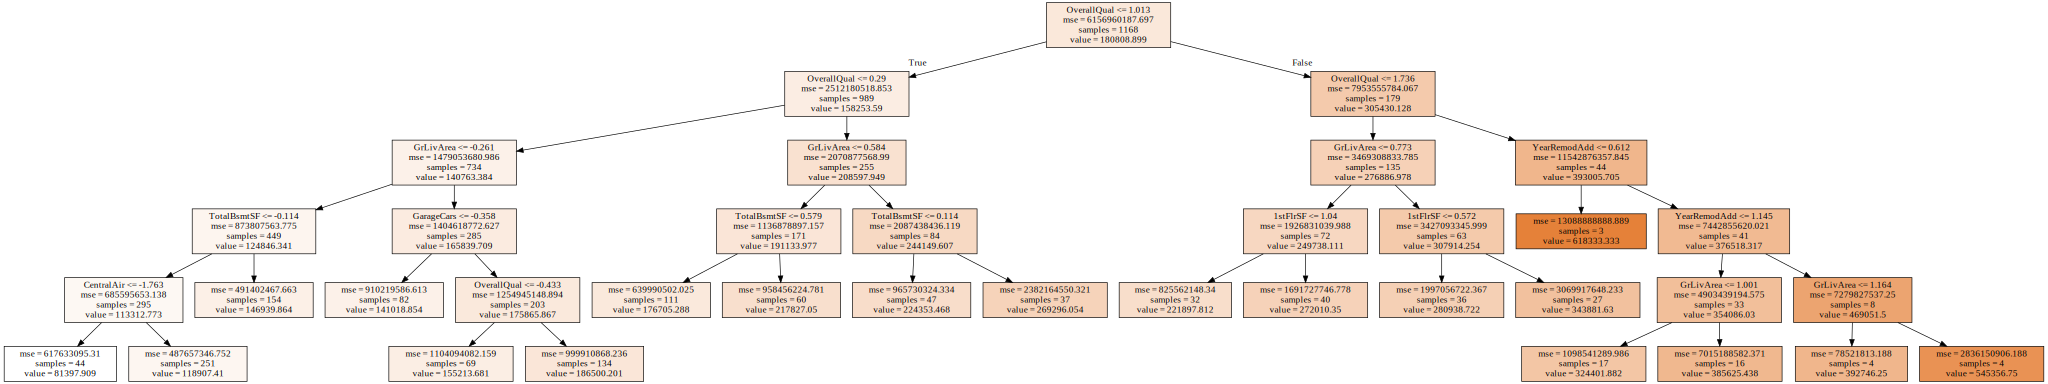

In [25]:
features = df[final_features].columns
label = ['SalePrice']
target = df[label].columns
dot_data = tree.export_graphviz(
    DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 19, min_samples_leaf = 3, splitter = 'best', random_state = 0).fit(X_train, y_train), 
    out_file = None, feature_names = features, class_names = target, filled = True
    )
graph = graphviz.Source(dot_data, format = "jpg")
display(graph)

# Random Forest Regressor
It it an ensemble technique capable of performing regression. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
<div style="width:100%;text-align: center;"><img align = "left" src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" style="height:300px;"></div>

In [26]:
rfr = RandomForestRegressor()
param_grid = {'n_estimators': list(range(100, 200, 10)),
             'max_depth': list(range(4, 7)),
             'min_samples_split': list(range(2, 4))}
grid_search_rfr = GridSearchCV(rfr, param_grid, cv = 5)
grid_search_rfr.fit(X_train, y_train)
y_pred = grid_search_rfr.predict(X_test)
rmse_rfr_grid = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error is:", rmse_rfr_grid)
print("RFR Score is:", grid_search_rfr.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error is: 31823.02488727946
RFR Score is: 85.33555002997333 %


# AdaBoost Regressor
AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [27]:
abr = AdaBoostRegressor(random_state = 0)
param_grid = {'n_estimators': list(range(100, 1000, 100)),
             'learning_rate': [0.001, 0.01, 0.1, 1, 10]}
grid_search_abr = GridSearchCV(abr, param_grid, cv = 5)
grid_search_abr.fit(X_train, y_train)
y_pred = grid_search_abr.predict(X_test)
rmse_abr_grid = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error is:", rmse_abr_grid)
print("ABR Score is:", grid_search_abr.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error is: 33797.73899311611
ABR Score is: 83.45913729662647 %


# XGBoost Regressor
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

In [28]:
xgb = XGBRegressor()
param_grid = {'n_estimators': list(range(500, 1000, 100)),
             'learning_rate': [0.001, 0.01, 0.1]}
grid_search_xgb = GridSearchCV(xgb, param_grid, cv = 5)
grid_search_xgb.fit(X_train, y_train)
y_pred = grid_search_xgb.predict(X_test)
rmse_xgb_grid = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error is:", rmse_xgb_grid)
print("XGB Score is:", grid_search_xgb.score(X_test, y_test) * 100, "%")

The Root Mean Squared Error is: 31254.180456318492
XGB Score is: 85.85512571098748 %


# Visualizing the Results

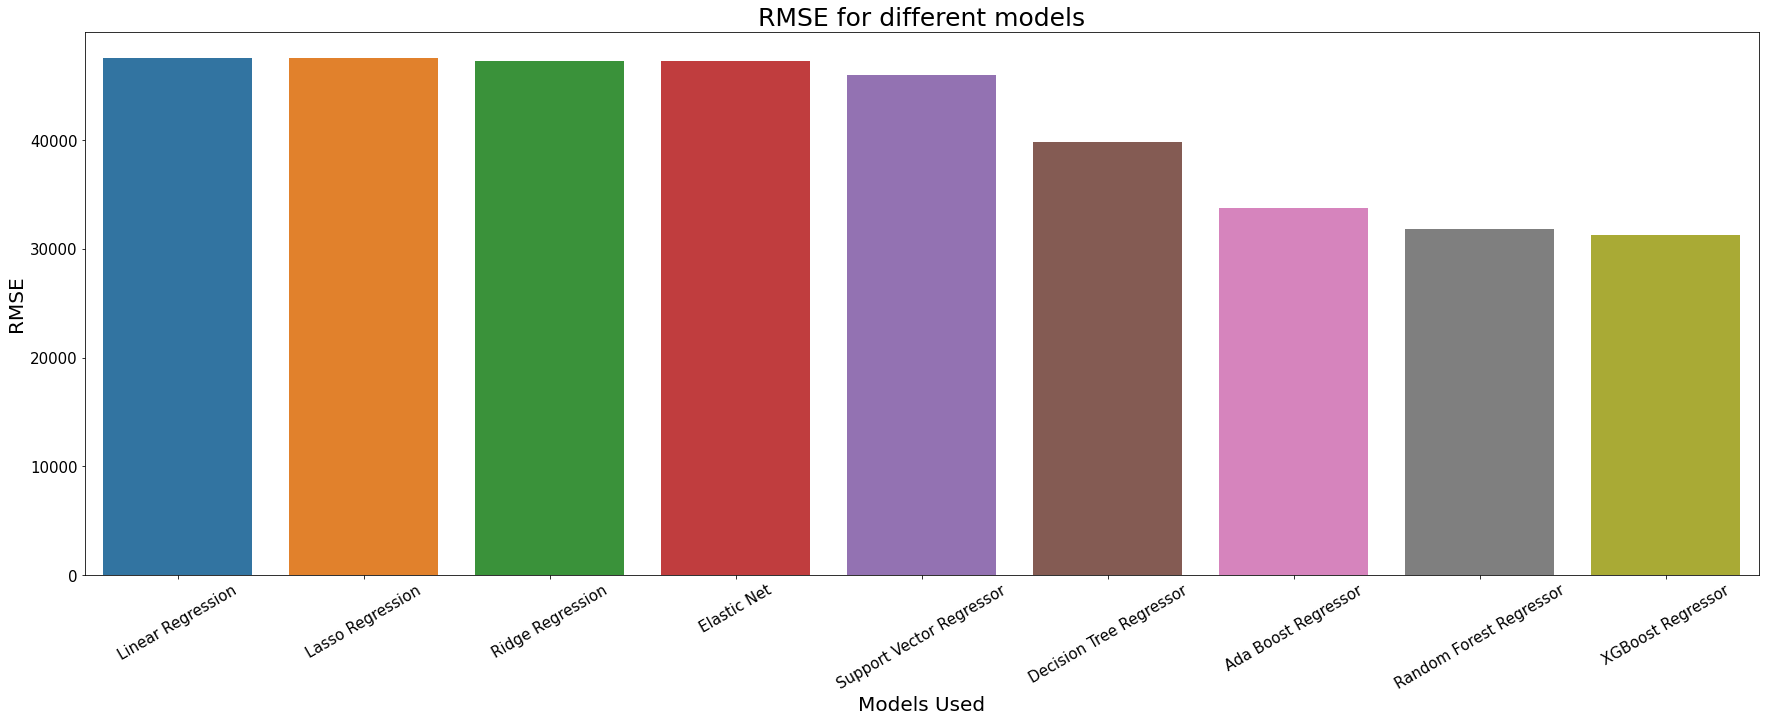

In [29]:
data = {'Linear Regression': rmse_lin_reg, 'Ridge Regression': rmse_ridge_reg, 'Lasso Regression': rmse_las_reg, 'Elastic Net': rmse_el_net,
        'Support Vector Regressor': rmse_svr, 'Decision Tree Regressor': rmse_dtr, 'Random Forest Regressor': rmse_rfr_grid,
        'Ada Boost Regressor': rmse_abr_grid, 'XGBoost Regressor': rmse_xgb_grid}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
RMSE = list(data.values())
fig = plt.figure(figsize = (30, 10))
sns.barplot(x = models, y = RMSE)
plt.xlabel("Models Used", size = 20)
plt.xticks(rotation = 30, size = 15)
plt.ylabel("RMSE", size = 20)
plt.yticks(size = 15)
plt.title("RMSE for different models", size = 25)
plt.show()

# Preparing the Submission File

In [30]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df = df[final_features]
df[cat_cols] = df[cat_cols].astype(str)
df[cat_cols] = df[cat_cols].apply(label_encoder.fit_transform)
X = df
X = scaler.fit_transform(X)
y_pred_xgb = grid_search_xgb.predict(X)
final_pred = list(y_pred_xgb)
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')['Id']
df = pd.DataFrame(df)
df['SalePrice'] = final_pred
df.to_csv('submission', index = False)
df.head()

,Id,SalePrice
0,1461,118290.640625
1,1462,147719.640625
2,1463,164619.156250
3,1464,182630.718750
4,1465,204052.359375
